In [16]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r'C:\Users\pnaik27\ML_2021\Logistic_regression\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


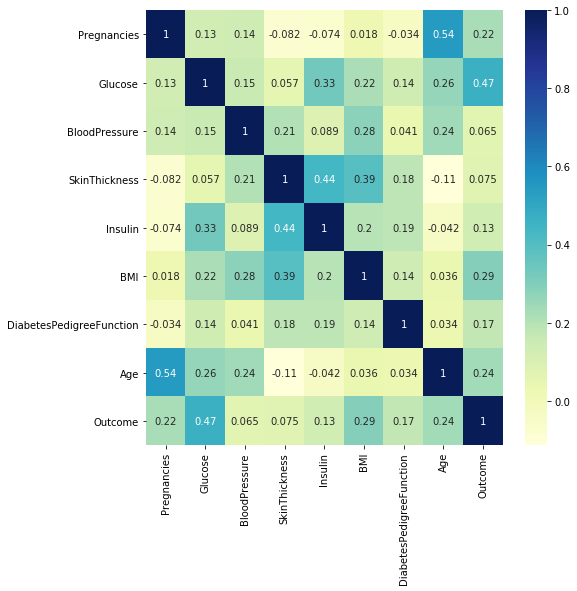

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

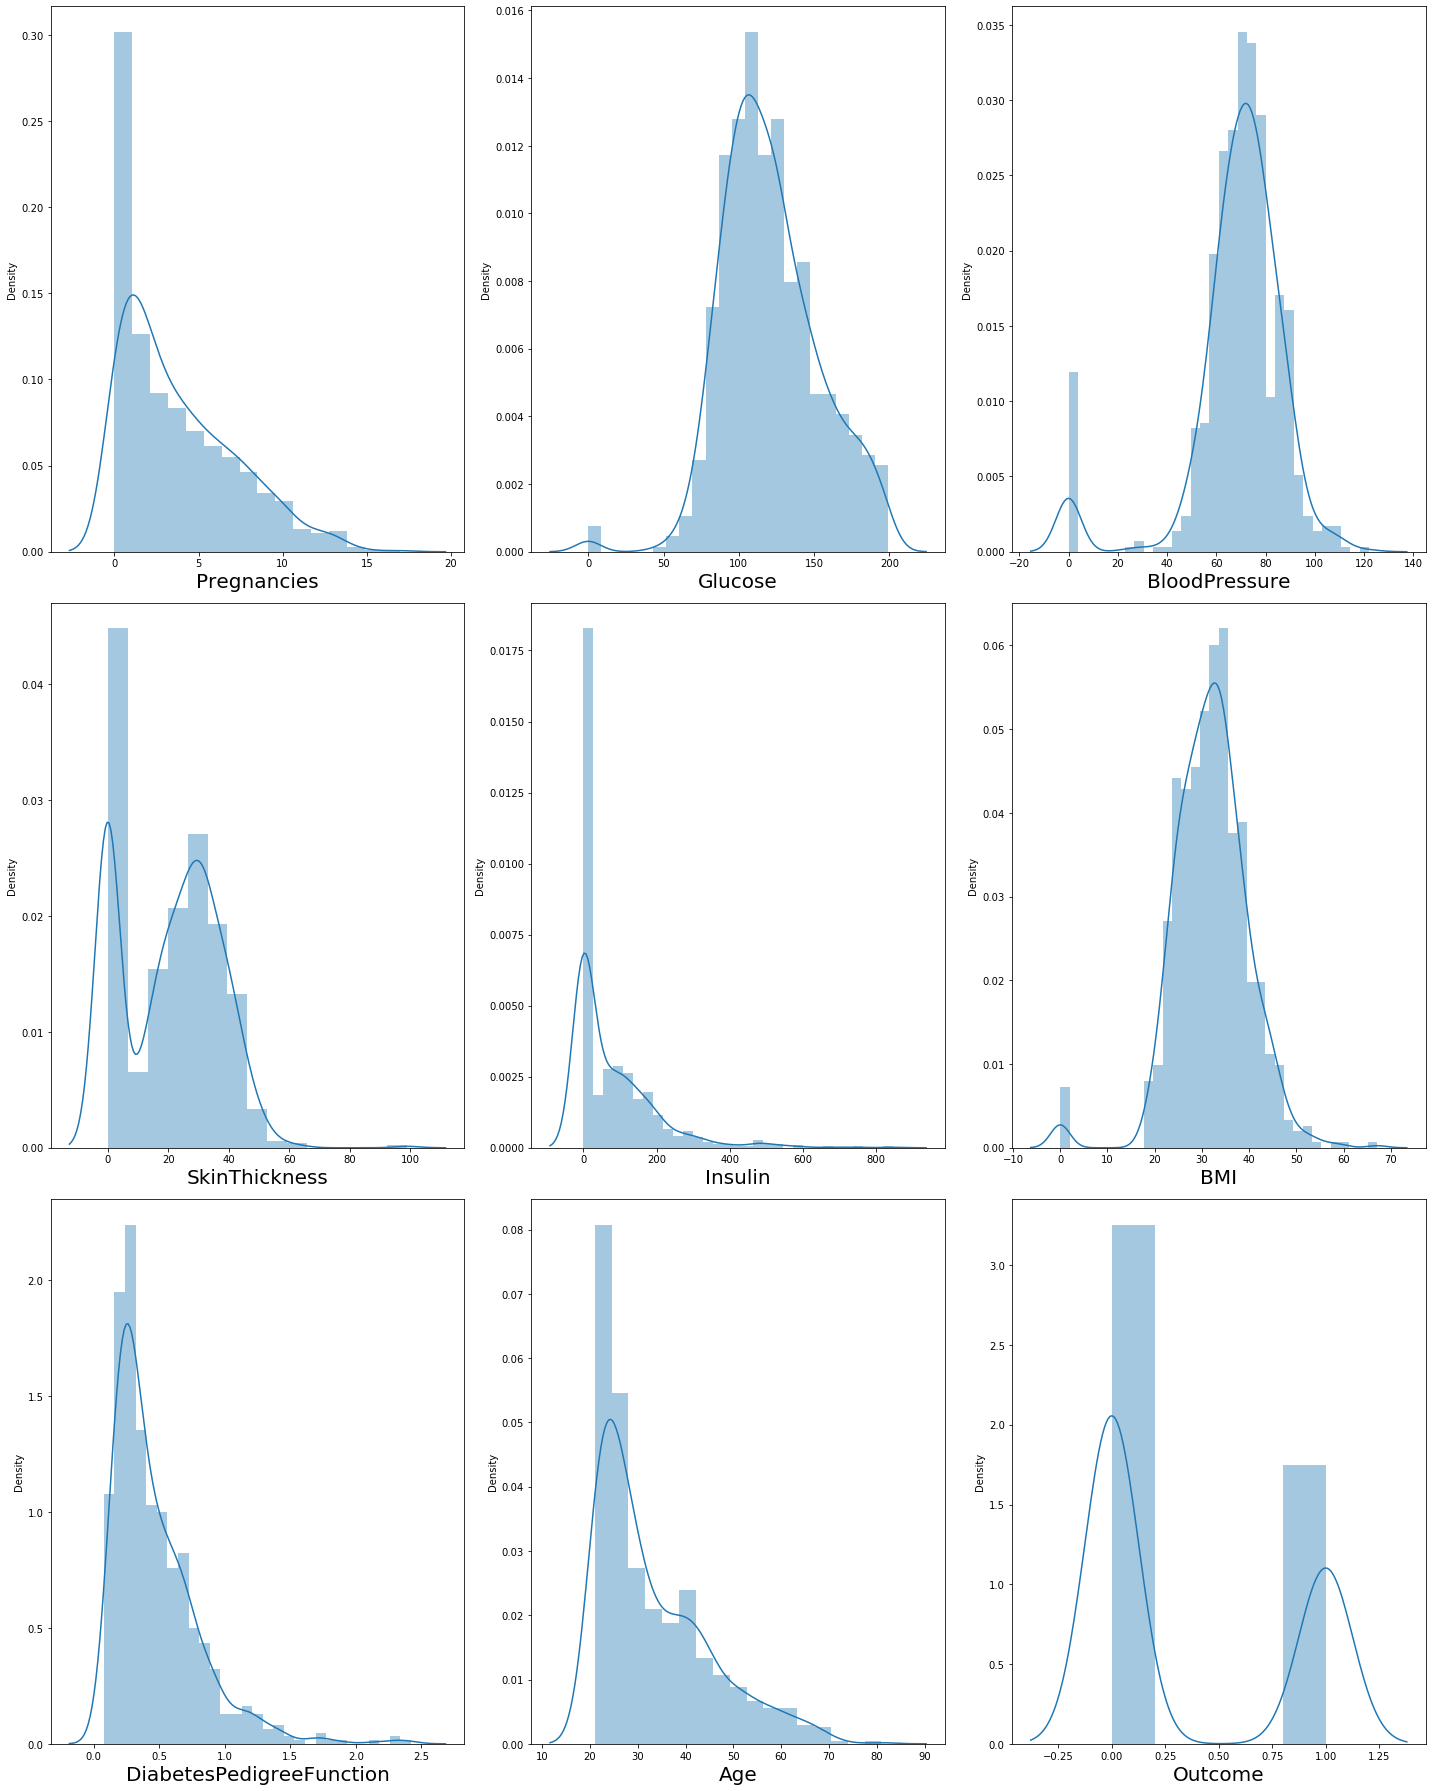

In [21]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for col in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [22]:
df[df['Insulin']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [23]:
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())

In [25]:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())

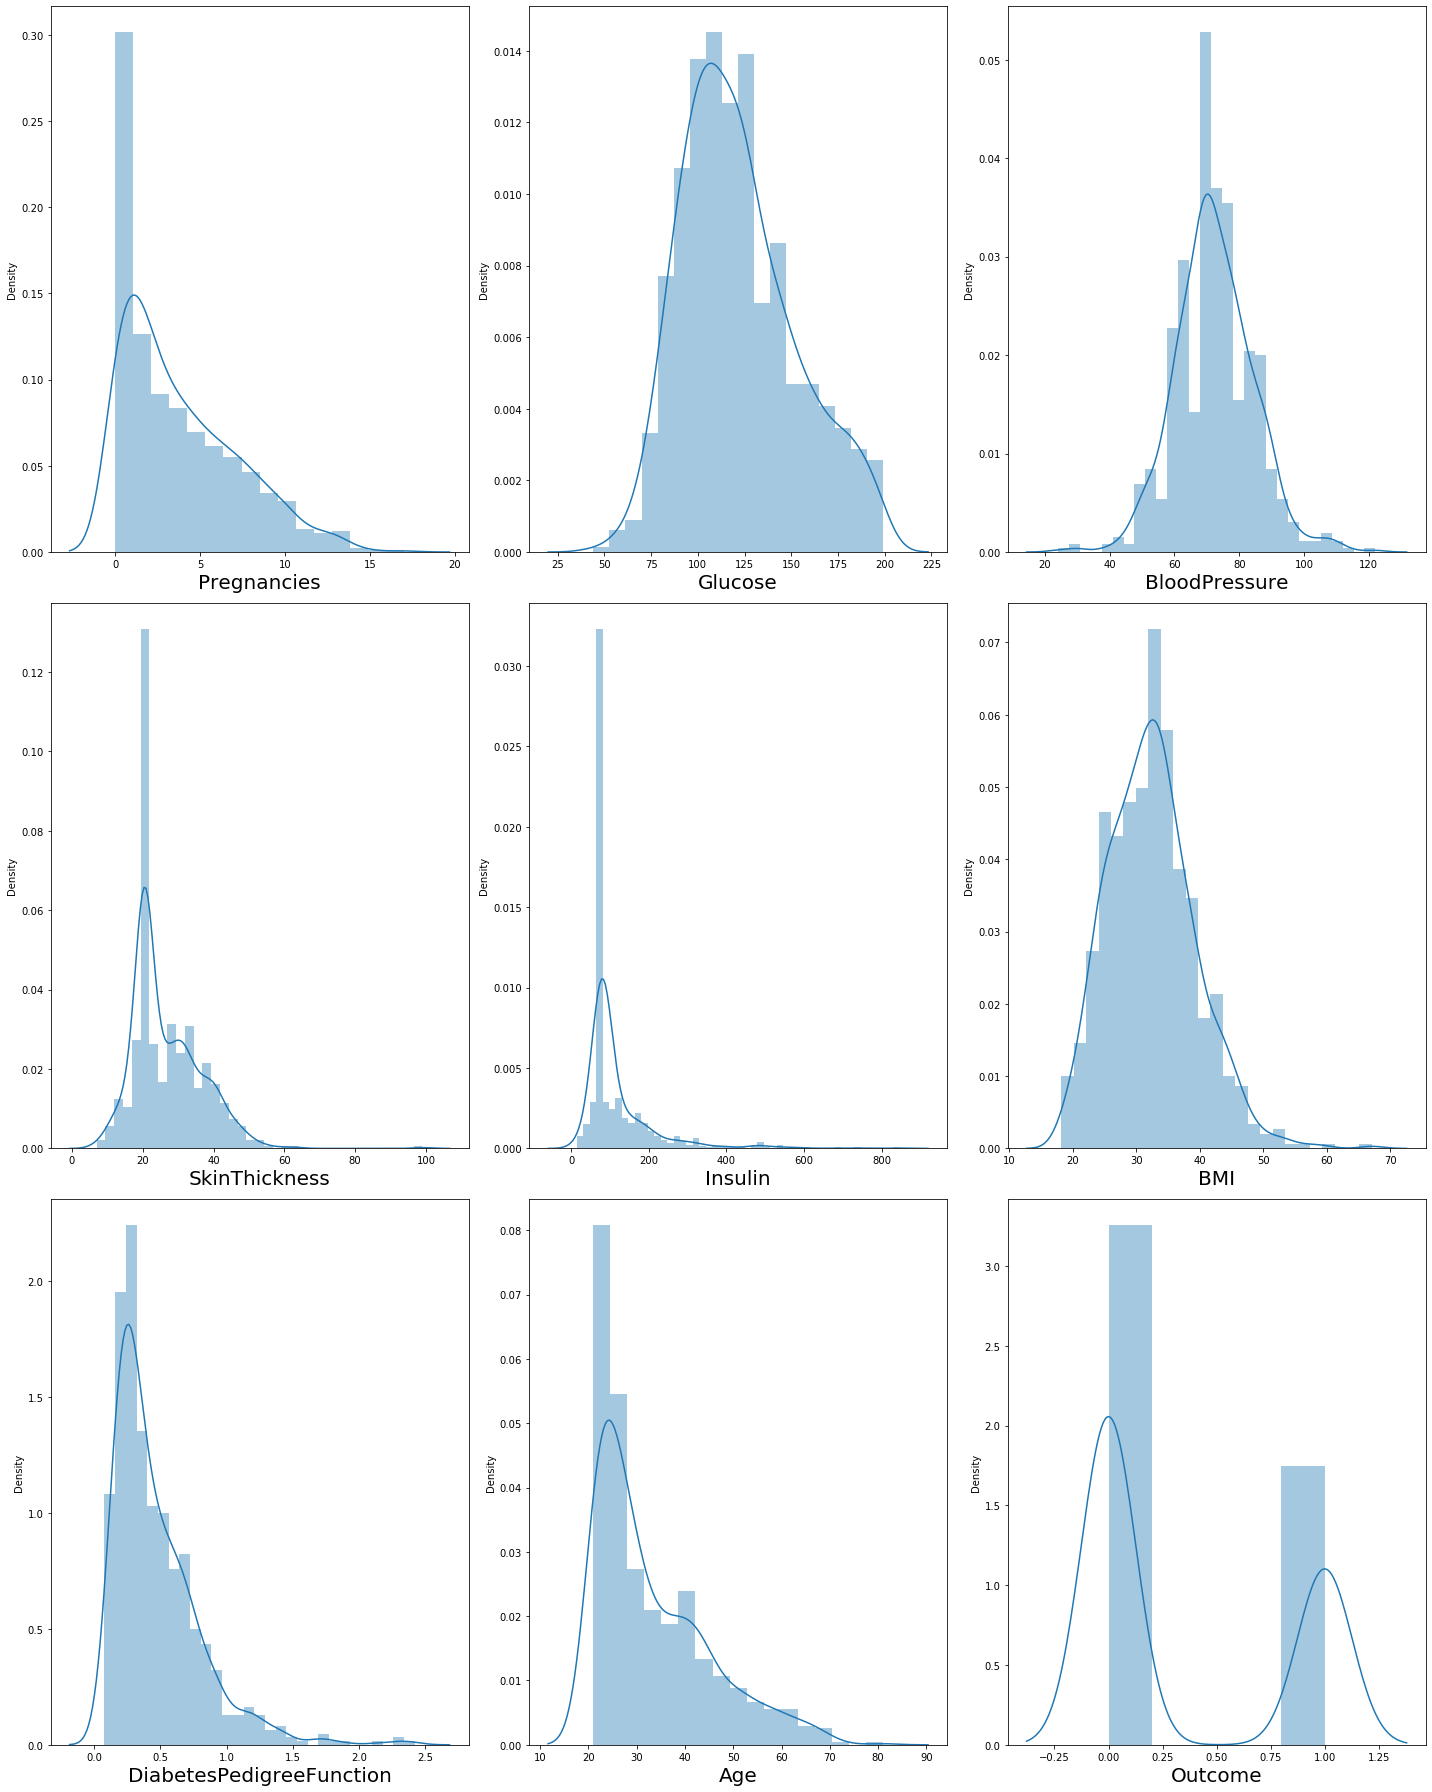

In [26]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for col in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

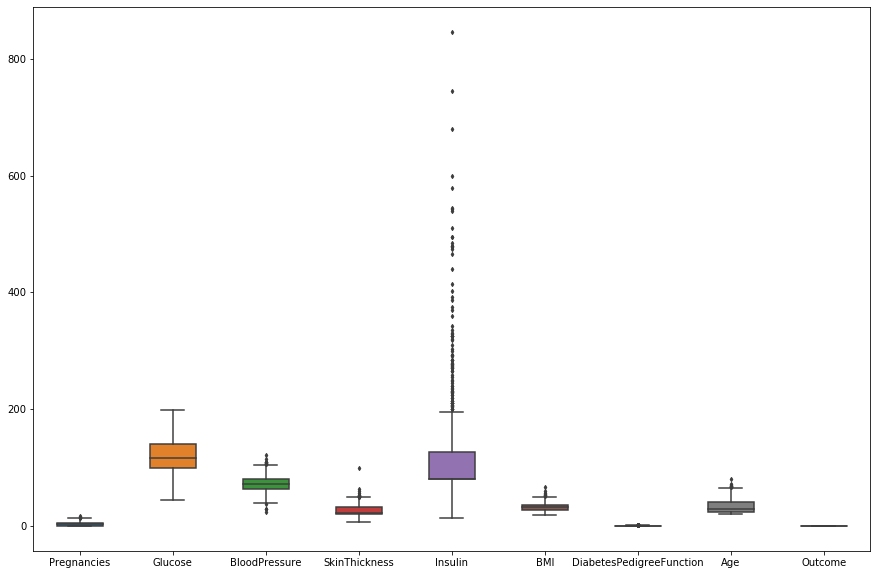

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


In [34]:
y=df['Outcome']
x=df.drop(columns=['Outcome'])

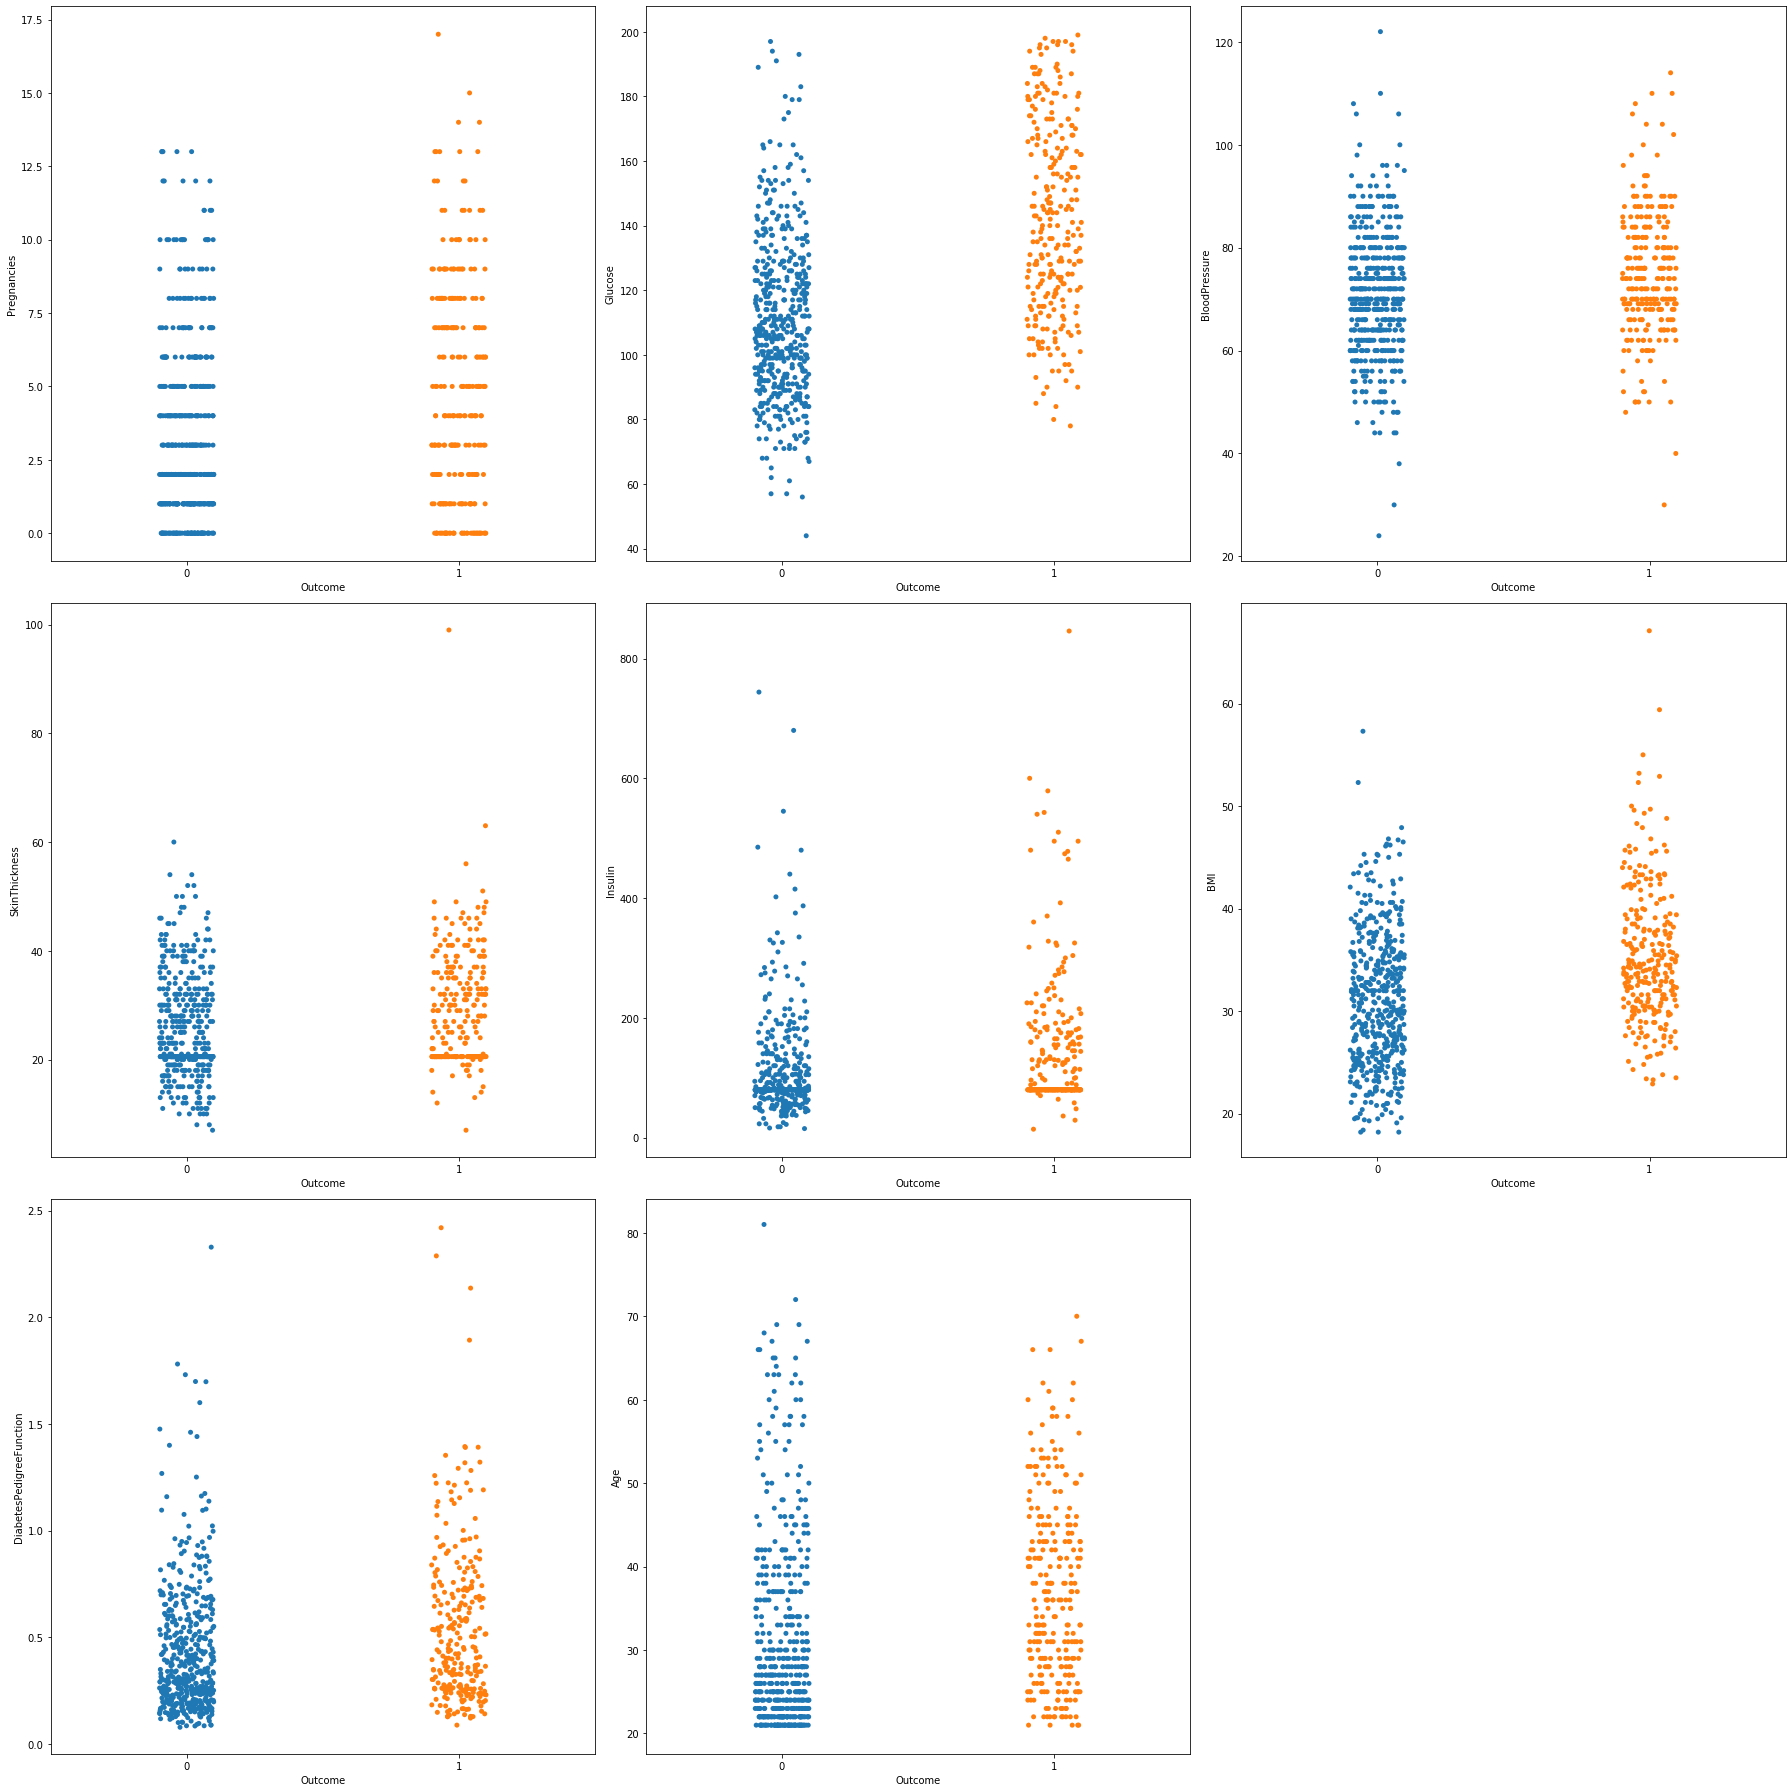

In [38]:
plt.figure(figsize=(25,25), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

In [39]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [40]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [41]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#let's check the values
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [42]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.25, random_state = 355)

In [43]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [44]:
y_pred = log_reg.predict(x_test)

In [45]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7552083333333334

In [46]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[110,  15],
       [ 32,  35]], dtype=int64)

In [47]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [48]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7552083333333334

In [49]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.88

In [50]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.7746478873239436

In [51]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8239700374531835

In [52]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7011940298507463

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

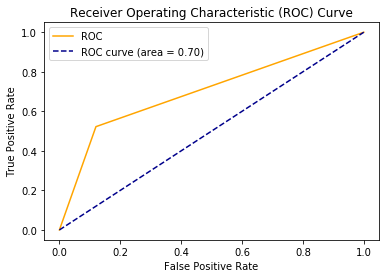

In [54]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [65]:
log_reg.predict([[1,89.0,66.0,23.00,94.00,28.1,0.167,21]])

array([1], dtype=int64)

In [66]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1
767,1,93.0,70.0,31.000000,79.799479,30.4,0.315,23,0


In [68]:
log_reg.predict([[1,93.0,70.0,31.00,79.799479,30.4,0.315,23]])

array([1], dtype=int64)

In [69]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [70]:
x_test

array([[ 0.63994726, -0.15391817,  1.96110943, ..., -0.54589754,
        -0.9509638 , -0.27575966],
       [-1.14185152,  0.63513518,  0.97003251, ..., -0.00739425,
        -0.11741105, -0.95646168],
       [ 0.04601433,  0.40499462, -0.0210444 , ..., -1.25905054,
        -0.58854956,  2.27687294],
       ...,
       [ 0.3429808 , -1.17311209, -0.35140338, ..., -0.3275854 ,
        -0.32579923, -0.78628618],
       [ 0.93691372,  1.88446966,  1.87851969, ...,  0.25458032,
        -0.92982297,  2.27687294],
       [-0.54791859, -0.94297153, -0.68176235, ...,  0.80763774,
         0.61043756, -0.87137393]])

In [93]:
x_scl=scaler.fit_transform([[2,197.0,70.0,45.000000,543.000000,30.5,0.158,53]])

In [94]:
log_reg.predict(x_scl)
#log_reg.predict(scaler.fit_transform([[1,85.0,66.0,29.000000,79.799479,26.6,0.351,31]]))

array([0], dtype=int64)

In [78]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [86]:
df[df['Outcome']==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
6,3,78.0,50.0,32.000000,88.000000,31.0,0.248,26,1
8,2,197.0,70.0,45.000000,543.000000,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128.0,88.0,39.000000,110.000000,36.5,1.057,37,1
757,0,123.0,72.0,20.536458,79.799479,36.3,0.258,52,1
759,6,190.0,92.0,20.536458,79.799479,35.5,0.278,66,1
761,9,170.0,74.0,31.000000,79.799479,44.0,0.403,43,1
